In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os

In [11]:
path2target = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/93/01/elastic/'

elastic_dirs = glob(f'{path2target}/e_*')

In [12]:
def get_mechanical_props(lines):
    for l in lines:
        if 'Elastic Constant C11all' in l and 'GPa' in l:
            C11 = float(l.split(' ')[-2])
        
        if 'Elastic Constant C12all' in l and 'GPa' in l:
            C22 = float(l.split(' ')[-2])
        
        if 'Elastic Constant C44all' in l and 'GPa' in l:
            C44 = float(l.split(' ')[-2])

        if 'Bulk Modulus' in l and 'GPa' in l:
            bulk_modulus = float(l.split(' ')[-2])
        
        if 'Shear Modulus 1' in l and 'GPa' in l:
            shear_modulus = float(l.split(' ')[-2])
        
        if 'Shear Modulus 2' in l and 'GPa' in l:
            shear_modulus2 = float(l.split(' ')[-2])
        
        if 'Poisson Ratio' in l and '$' not in l:
            poisson_ratio = float(l.split(' ')[-1])
        
    return {
        'c11': C11,
        'c22': C22,
        'c44': C44,
        'bulk_modulus': bulk_modulus,
        'shear_modulus': shear_modulus,
        'shear_modulus2': shear_modulus2,
        'poisson_ratio': poisson_ratio
    }

In [13]:
props_list = []
for path in elastic_dirs:
    with open(os.path.join(path, 'log.lammps'), mode='r') as f:
        lines = [s.strip() for s in f.readlines()]
    props = get_mechanical_props(lines)
    props['epoch'] = int(path.split('/')[-1].split('_')[-1])
    props_list.append(props)

In [14]:
mechanical_prop_df = pd.DataFrame.from_records(props_list)

In [15]:
mechanical_prop_df

,c11,c22,c44,bulk_modulus,shear_modulus,shear_modulus2,poisson_ratio,epoch
0,7.205604e+01,2.949366e+01,35.910844,4.368112e+01,35.910844,21.281190,0.290436,40
1,7.563269e+01,4.181172e+01,32.495274,5.308538e+01,32.495275,16.910485,0.356013,47
2,1.052612e+02,5.435264e+01,52.595269,7.132215e+01,52.595269,25.454258,0.340526,49
3,6.569970e+01,3.117934e+01,28.723596,4.268613e+01,28.723596,17.260178,0.321838,22
4,6.008634e+01,2.371118e+01,25.683609,3.583623e+01,25.683609,18.187581,0.282958,25
5,9.186725e+05,9.186381e+05,67.244221,9.186496e+05,66.187725,17.231478,0.499991,13
6,6.510670e+01,3.406983e+01,27.531965,4.441545e+01,27.531965,15.518435,0.343527,14
7,2.115819e+05,2.085363e+05,63.044897,2.075563e+05,62.688191,26.442979,0.499936,48
8,8.775935e+01,3.928078e+01,45.401999,5.544030e+01,45.401999,24.239285,0.309200,46
9,8.268175e+01,3.012602e+01,42.325878,4.764459e+01,42.325877,26.277864,0.267056,41


In [16]:
mechanical_prop_df = mechanical_prop_df.query('epoch > 1')

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39

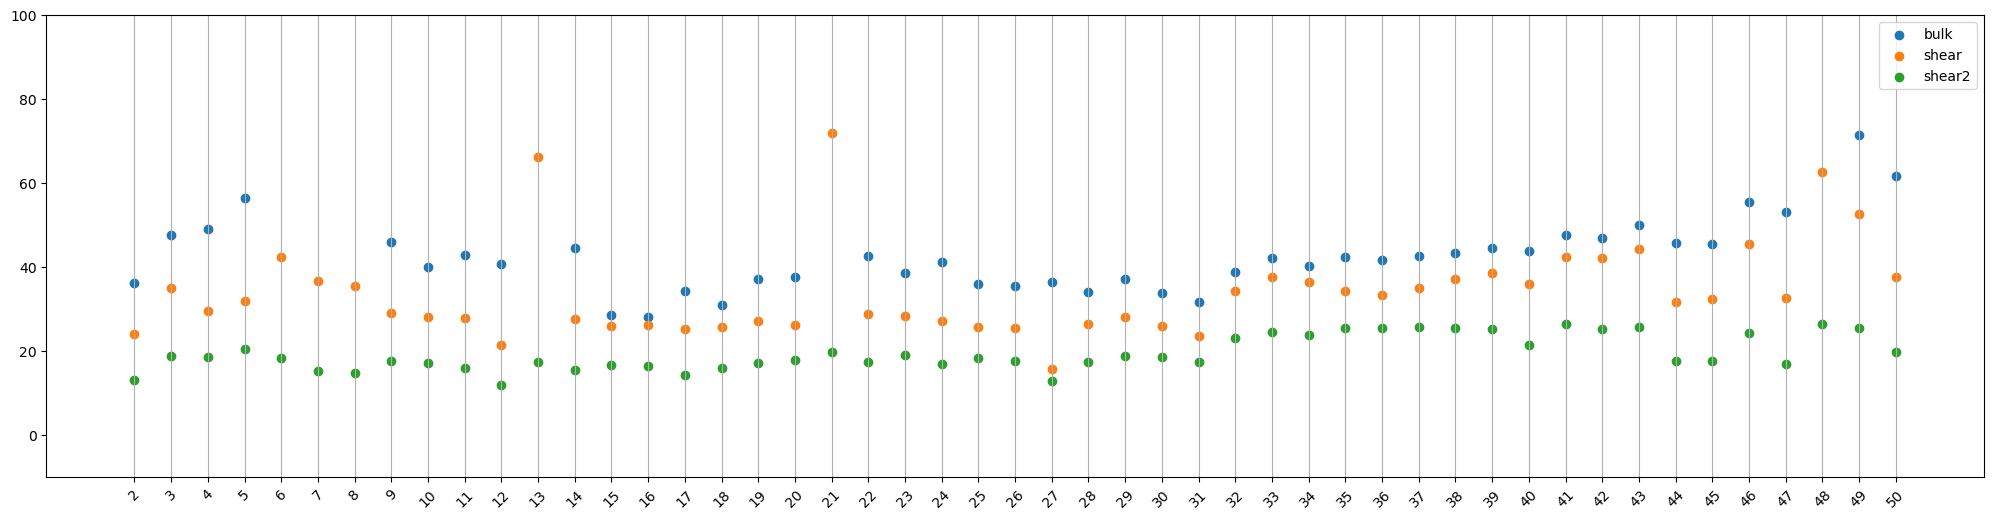

In [17]:
fig = plt.figure(figsize=(25,6))
ax = fig.add_subplot(111)

ax.scatter(mechanical_prop_df['epoch'], mechanical_prop_df['bulk_modulus'], label='bulk')
ax.scatter(mechanical_prop_df['epoch'], mechanical_prop_df['shear_modulus'], label='shear')
ax.scatter(mechanical_prop_df['epoch'], mechanical_prop_df['shear_modulus2'], label='shear2')
ax.grid(axis='x')
ax.legend()
ax.set_ylim(-10, 100)
ax.set_xticks(sorted(mechanical_prop_df['epoch'].values))
plt.xticks(rotation=45)

In [18]:
mechanical_prop_df.query('epoch == 46')

,c11,c22,c44,bulk_modulus,shear_modulus,shear_modulus2,poisson_ratio,epoch
8,87.759346,39.280776,45.401999,55.440299,45.401999,24.239285,0.3092,46
